# 6.6 - Boat Sales: Sourcing & Analyzing Time-Series Data

### Table of Contents

#### 1. Importing Libraries and Data
#### 2. Subsetting, wrangling, and cleaning time-series data
#### 3. Time series analysis: decomposition
#### 4. Testing for stationarity
#### 5. Stationarizing the IMF Cross Country Macroeconomic Statistics Data
#### 6. Exporting Data

### 01. Importing Libraries and Data

In [1]:
import nasdaqdatalink
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import os
import warnings 

warnings.filterwarnings("ignore") 

plt.style.use('fivethirtyeight') 

In [2]:
# Configure API key 

nasdaqdatalink.ApiConfig.api_key = 'iBnhCqivYZCp1LyMMRYm'

In [3]:
# Importing the IMF Cross Country Macroeconomic Statistics Data.

data = nasdaqdatalink.get_table('QDL/ODA', paginate = True)

In [4]:
# check the first 5 rows

data.head(5)

,indicator,date,value
None,,,
0,ZWE_TX_RPCH,2028-12-31,NaN
1,ZWE_TX_RPCH,2027-12-31,NaN
2,ZWE_TX_RPCH,2026-12-31,NaN
3,ZWE_TX_RPCH,2025-12-31,NaN
4,ZWE_TX_RPCH,2024-12-31,NaN


In [5]:
data.shape

(504112, 3)

In [6]:
data.columns

Index(['indicator', 'date', 'value'], dtype='object')

In [7]:
type(data)

pandas.core.frame.DataFrame

In [8]:
# create a subset of germany (country with most of the boats in the dataset) with only two columns (date and value)

subset_germany = data[data['indicator'] == 'DEU_PPPPC'][['value', 'date']]


In [9]:
# check subset for germany

subset_germany

,value,date
None,,
394793,78438.026,2028-12-31
394794,76062.741,2027-12-31
394795,73742.707,2026-12-31
394796,71044.480,2025-12-31
394797,68316.526,2024-12-31
394798,66132.494,2023-12-31
394799,63815.766,2022-12-31
394800,59016.821,2021-12-31
394801,55058.505,2020-12-31


In [10]:
# define date as index

subset_germany.set_index('date', inplace=True)

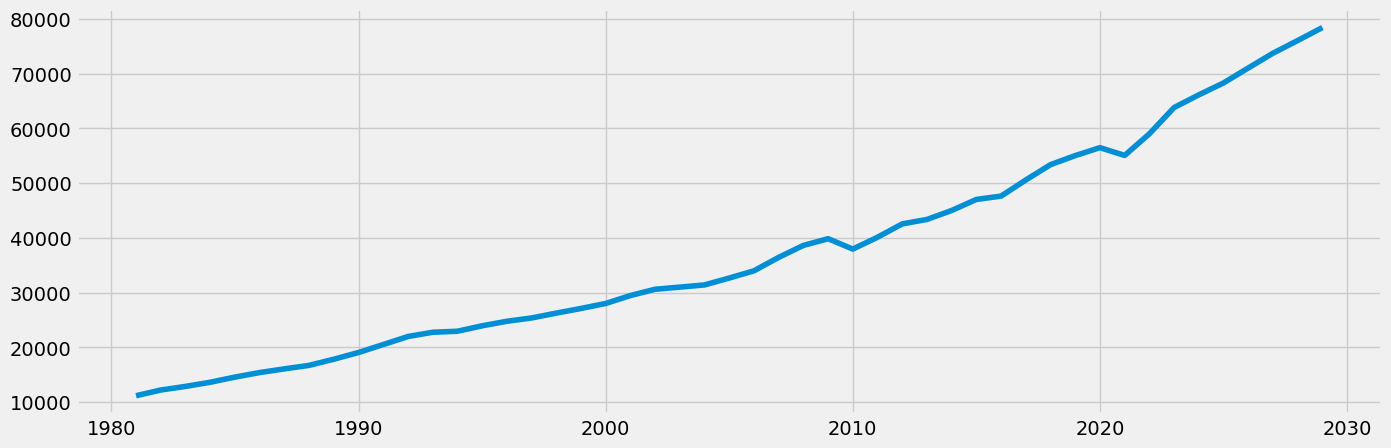

In [11]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100) 

plt.plot(subset_germany)

### 2. Subsetting, wrangling, and cleaning time-series data

In [12]:
# check data information

data

,indicator,date,value
None,,,
0,ZWE_TX_RPCH,2028-12-31,NaN
1,ZWE_TX_RPCH,2027-12-31,NaN
2,ZWE_TX_RPCH,2026-12-31,NaN
3,ZWE_TX_RPCH,2025-12-31,NaN
4,ZWE_TX_RPCH,2024-12-31,NaN
...,...,...,...
504107,ABW_BCA,1984-12-31,NaN
504108,ABW_BCA,1983-12-31,NaN
504109,ABW_BCA,1982-12-31,NaN


In [13]:
data.columns

Index(['indicator', 'date', 'value'], dtype='object')

In [14]:
# create a data subset with only information from a specific data 
# in this case, I included everything from 1900 to the present, since these information are in the boat sales dataset and are relevant

data_sub = data.loc[(data['date'] >= '1900-01-01') & (data['date'] < '2022-01-01')]

In [15]:
# filter to include only top 15 countries with most of the boats (Germany, Italy, France, Switzerland, Croatia (Hrvatska), Spain,
# Netherlands, United Kingdom, Portugal, Austria, Greece, Denmark, Turkey, Belgium, Slovenia

data_sub = data_sub[data_sub['indicator'].isin(['DEU_PPPPC', 'ITA_PPPPC', 'FRA_PPPPC', 'CHE_PPPPC', 'HRV_PPPPC'
                    , 'ESP_PPPPC', 'NLD_PPPPC', 'GBR_PPPPC', 'PRT_PPPPC', 'AUT_PPPPC', 'GRC_PPPPC', 'DNK_PPPPC', 'TUR_PPPPC',
                    'BEL_PPPPC', 'SVN_PPPPC'])]


In [16]:
data_sub['indicator'].value_counts().head(15)

indicator
TUR_PPPPC    42
SVN_PPPPC    42
PRT_PPPPC    42
NLD_PPPPC    42
ITA_PPPPC    42
HRV_PPPPC    42
GRC_PPPPC    42
GBR_PPPPC    42
FRA_PPPPC    42
ESP_PPPPC    42
DNK_PPPPC    42
DEU_PPPPC    42
CHE_PPPPC    42
BEL_PPPPC    42
AUT_PPPPC    42
Name: count, dtype: int64

In [17]:
# check first five rows

data_sub.head(5)

,indicator,date,value
None,,,
53760,TUR_PPPPC,2021-12-31,35037.676
53761,TUR_PPPPC,2020-12-31,30496.557
53762,TUR_PPPPC,2019-12-31,29693.792
53763,TUR_PPPPC,2018-12-31,29350.041
53764,TUR_PPPPC,2017-12-31,28242.491


In [18]:
# Considering that the boat sales dataframe has only information from year, I will create a column called 'year' 

# first I will create a datetime column 

from datetime import datetime

data_sub['datetime'] = pd.to_datetime(data_sub['date']) # Create a datetime column from "Date."

In [19]:
# to be able to combine the tables, I will create a year column that will be connected to the year_built column
# from boat sales dataframe

data_sub['year'] = data_sub['datetime'].dt.year


In [20]:
# define datetime as index and drop the original date column

data_sub = data_sub.set_index('datetime') # Set the datetime as the index of the dataframe.

data_sub.drop(['date'], axis=1, inplace=True) # Drop the "Date" column.

data_sub.head()

,indicator,value,year
datetime,,,
2021-12-31,TUR_PPPPC,35037.676,2021
2020-12-31,TUR_PPPPC,30496.557,2020
2019-12-31,TUR_PPPPC,29693.792,2019
2018-12-31,TUR_PPPPC,29350.041,2018
2017-12-31,TUR_PPPPC,28242.491,2017


In [21]:
data_sub.shape

(630, 3)

In [22]:
# Considering that the indicator refers to specific countries, 
# I defined a dictionary and create a new column with the proper name to join later with my dataframe

def indicator_country_name(indicator):
    country_mapping = {
        'TUR_PPPPC': 'Turkey',
        'SVN_PPPPC': 'Slovenia',
        'PRT_PPPPC': 'Portugal',
        'NLD_PPPPC': 'Netherlands',
        'ITA_PPPPC': 'Italy',
        'HRV_PPPPC': 'Croatia (Hrvatska)',
        'GRC_PPPPC': 'Greece',
        'GBR_PPPPC': 'United Kingdom',
        'FRA_PPPPC': 'France',
        'ESP_PPPPC': 'Spain',
        'DNK_PPPPC': 'Denmark',
        'DEU_PPPPC': 'Germany',
        'CHE_PPPPC': 'Switzerland',
        'BEL_PPPPC': 'Belgium',
        'AUT_PPPPC': 'Austria'
    }
    return country_mapping.get(indicator)

data_sub['Country'] = data_sub['indicator'].apply(indicator_country_name)

In [23]:
data_sub['Country'].value_counts()

Country
Turkey                42
Slovenia              42
Portugal              42
Netherlands           42
Italy                 42
Croatia (Hrvatska)    42
Greece                42
United Kingdom        42
France                42
Spain                 42
Denmark               42
Germany               42
Switzerland           42
Belgium               42
Austria               42
Name: count, dtype: int64

In [24]:
# Considering that this dataset refers to different countries, 
#I created a function to plot for each one of it based on their name

def country_plot_indicator(data_sub, country_name):
    country_indicator = data_sub[data_sub['Country'] == country_name]
    plt.figure(figsize=(15, 5), dpi=100)
    plt.plot(country_indicator.index, country_indicator['value'])
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.title(f'Value vs. Date for {country_name}')
    plt.show()

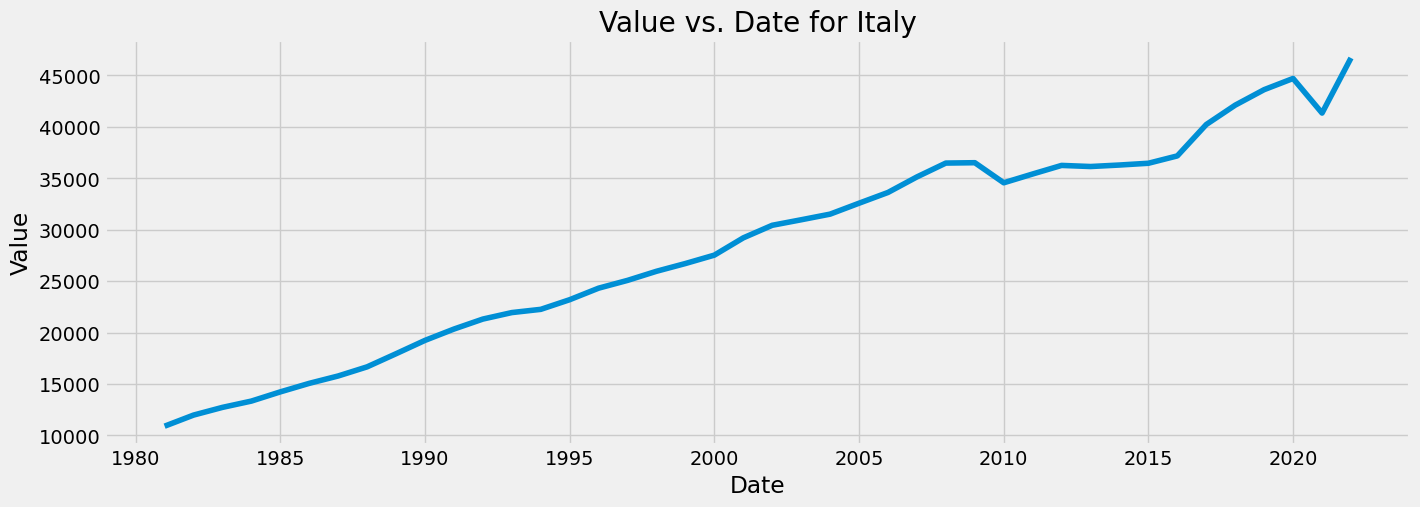

In [25]:
# exercise wise, I will plot a graph for Italy (second highest number of boats in my dataframe)

country_plot_indicator(data_sub, 'Italy')


In [26]:
# Check for missing values
data_sub.isnull().sum()

indicator     0
value        24
year          0
Country       0
dtype: int64

In [27]:
# create a variable to see the null values

null_values = data_sub[data_sub['value'].isnull()]

null_values

,indicator,value,year,Country
datetime,,,,
1991-12-31,SVN_PPPPC,NaN,1991,Slovenia
1990-12-31,SVN_PPPPC,NaN,1990,Slovenia
1989-12-31,SVN_PPPPC,NaN,1989,Slovenia
1988-12-31,SVN_PPPPC,NaN,1988,Slovenia
1987-12-31,SVN_PPPPC,NaN,1987,Slovenia
1986-12-31,SVN_PPPPC,NaN,1986,Slovenia
1985-12-31,SVN_PPPPC,NaN,1985,Slovenia
1984-12-31,SVN_PPPPC,NaN,1984,Slovenia
1983-12-31,SVN_PPPPC,NaN,1983,Slovenia


In [28]:
data_sub.shape

(630, 4)

In [29]:
# filter the null values out

filtered_data = data_sub.dropna(subset=['value'])

filtered_data.isnull().sum()

indicator    0
value        0
year         0
Country      0
dtype: int64

In [30]:
# check their shape

filtered_data.shape

(606, 4)

In [31]:
# Check for duplicates

dups = filtered_data.duplicated()
dups.sum()


0

In [32]:
filtered_data['Country'].value_counts()

Country
Turkey                42
Portugal              42
Netherlands           42
Italy                 42
Greece                42
United Kingdom        42
France                42
Spain                 42
Denmark               42
Germany               42
Switzerland           42
Belgium               42
Austria               42
Slovenia              30
Croatia (Hrvatska)    30
Name: count, dtype: int64

In [33]:
filtered_data.columns

Index(['indicator', 'value', 'year', 'Country'], dtype='object')

### 3. Time-series analysis: decomposition

In [34]:
# to be able to proceed with a decomposition, since there are non-numerical values in the data, I will create a new subset

sub_italy = filtered_data[filtered_data['Country'] == 'Italy'][['value']]

In [35]:
sub_italy = sub_italy[::-1]

sub_italy

,value
datetime,
1980-12-31,10895.763
1981-12-31,11973.705
1982-12-31,12723.270
1983-12-31,13334.619
1984-12-31,14231.603
1985-12-31,15060.229
1986-12-31,15777.148
1987-12-31,16664.216
1988-12-31,17942.199


In [36]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(sub_italy, model='additive', period = 1)

In [37]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

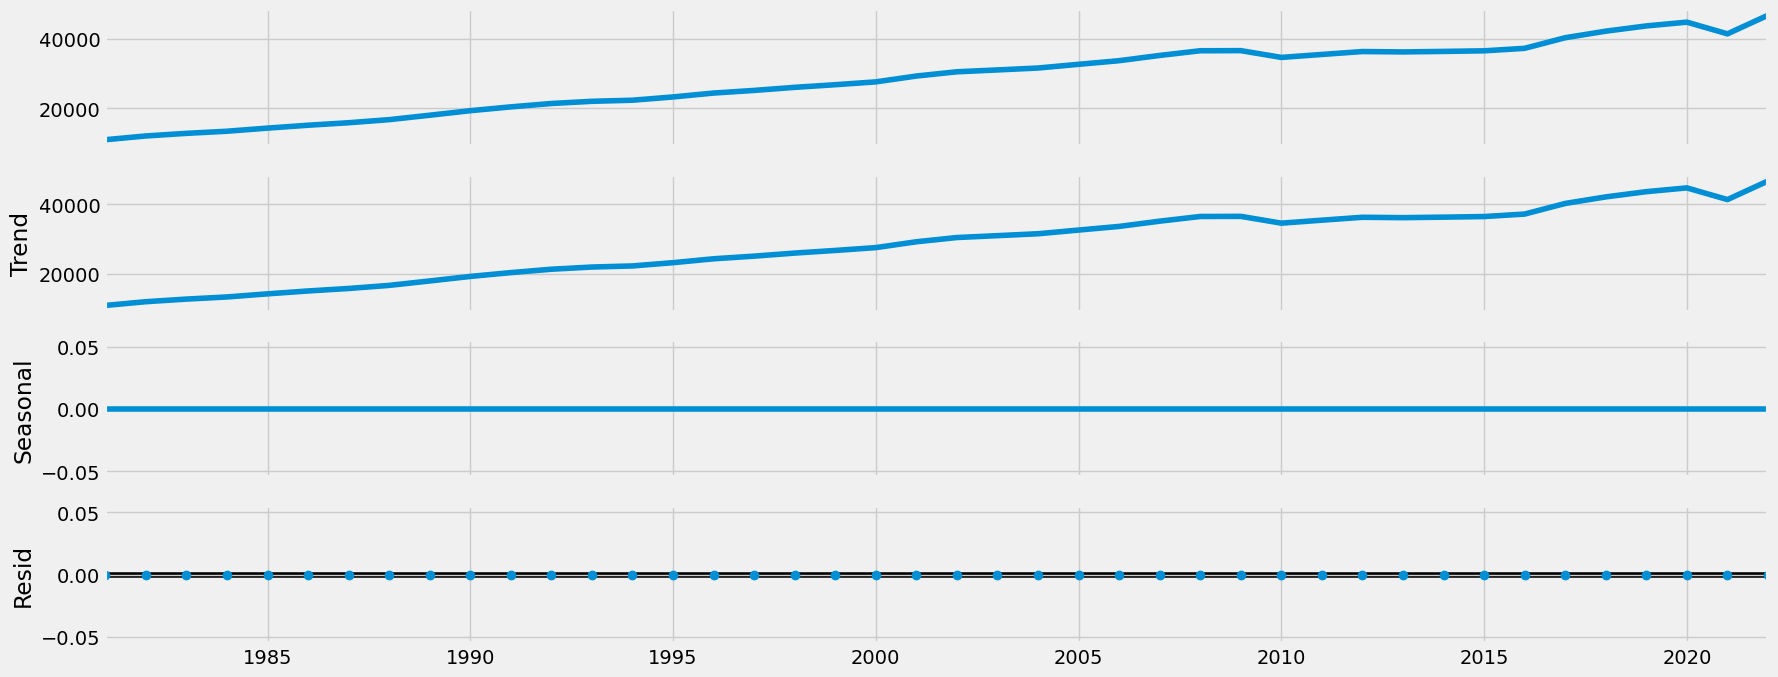

In [38]:
# Plot the separate components

decomposition.plot()
plt.show()

##### Analysis 

###### The first element is the level, which include all the components. But, as can be noticed, the level is exact the same as the underlying trend, which means the data is smooth, as has no noise, making both elements equal or extremly similar. 

###### Also, it's possible to notice that the chart gradually increases in a linear fashin from 1980 until 2008, dropping in 2009, possible due to the global financial crisis. But, the drop in 2009 occurs only in that year, as it is possible to notice a slightly increasing until 2019, for then dropping once again, possible due to the Covid-19, increasing once again from 2020 to 2021. Due to this momentary drops, it is possible to define this trend as dominant.

###### The third component should be the seasonality, but as can be seen, there plot is flat, which concludes that this data has no seasonality.

###### The fourth component is the noise and, since this component is the residual from what is left after the trend and seasonality is extract, we are left with a flat plot. The reason for that, is because there is no seasonality in this data, as well as the trend and level are equal, having nothing else to be represented as noise (or residual). Thus, there is not any unexplained noise in this data. 

### 4. Testing for stationarity

In [39]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(sub_italy['value'])

Dickey-Fuller Stationarity test:
Test Statistic                 -1.868988
p-value                         0.346788
Number of Lags Used             9.000000
Number of Observations Used    32.000000
Critical Value (1%)            -3.653520
Critical Value (5%)            -2.957219
Critical Value (10%)           -2.617588
dtype: float64


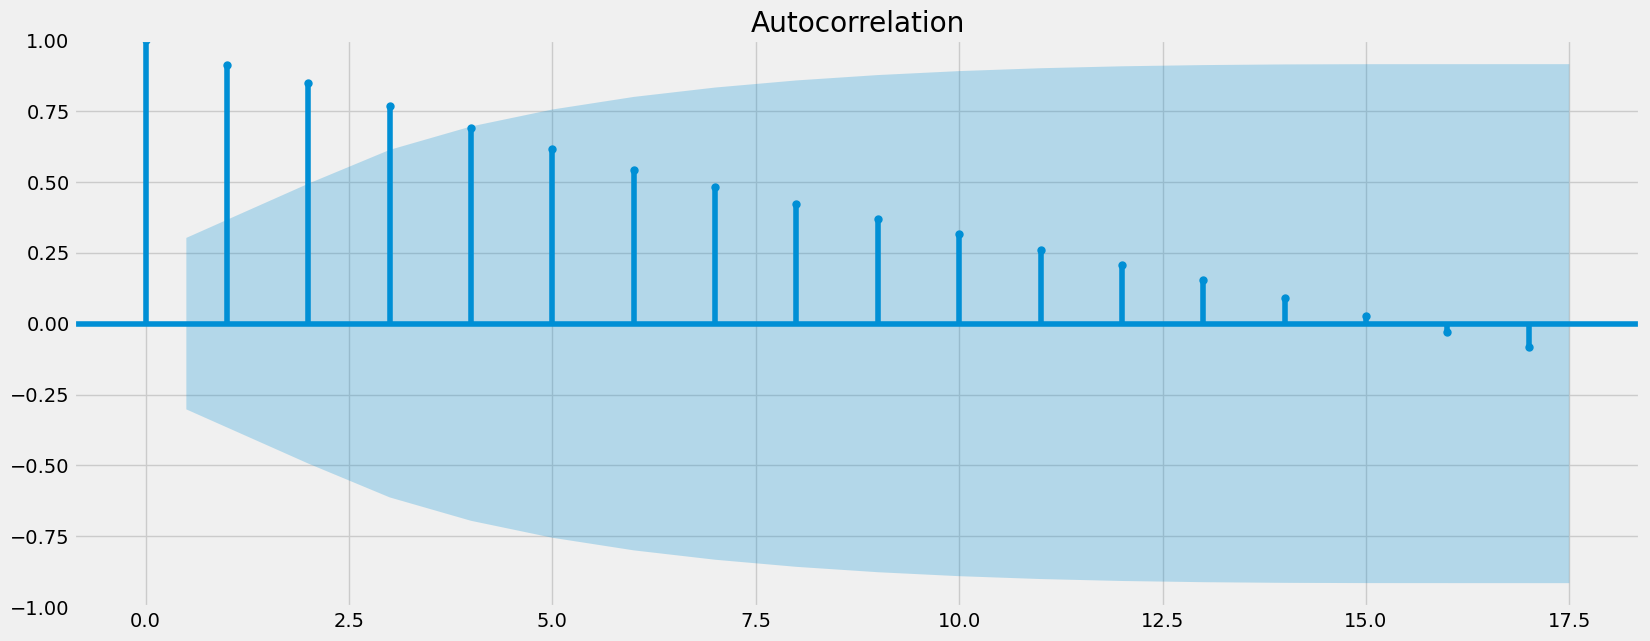

In [40]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(sub_italy)
plt.show()

##### Analysis 

###### According to my Dickey-Fuller Stationary Test:
###### My test statistic value (-1.868988) is higher than all Critical Values presents in my data, resulting in a non-stationary data. 
###### Also, my p-value is 0.836421, which is higher than a significant value, which would be less than 0.05. 
###### Thus, considering that my null hypothesis would be that my data is not stationary, I can't reject it, as my test statistic value is much higher than my significant value, and my p-value is not significant.

###### Lastly, my autocorrelation on the other hand does not show a lot of lags correlated to each other, only 4. In this case, it could be a indicative that my data is stationary, as usually only when ten significant lags are present would be necessary a differencing to turn the data stationary. 

###### To summarize, although autocorrelation does not demonstrate the need for differencing in my case, since there is no presence of more than 10 lags in this data, we can conclude that this dataset is not stationary, since: the test statistic value is greater than all critical values presents, as well as the p-value presented is not significant.

### 5. Stationarizing the IMF Cross Country Macroeconomic Statistics Data.


In [41]:
# The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

data_diff = sub_italy - sub_italy.shift(1) 

In [42]:
# Here, you remove the missing values that came about as a result of the differencing. 
# You need to remove these or you won't be able to run the Dickey-Fuller test.

data_diff.dropna(inplace = True) 

In [43]:
data_diff.head()

,value
datetime,
1981-12-31,1077.942
1982-12-31,749.565
1983-12-31,611.349
1984-12-31,896.984
1985-12-31,828.626


In [44]:
data_diff.columns

Index(['value'], dtype='object')

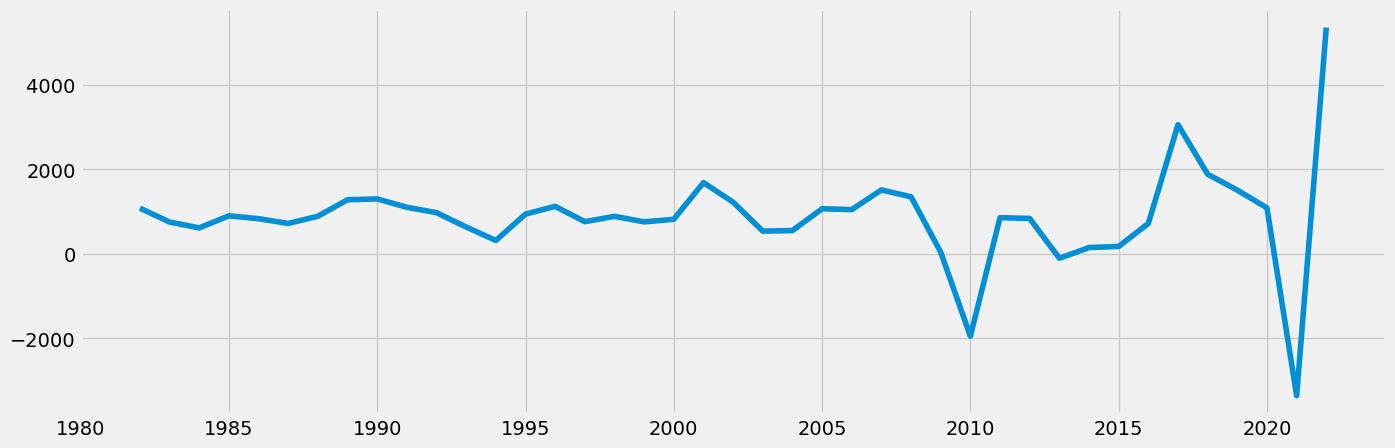

In [45]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [46]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                 -1.182018
p-value                         0.681283
Number of Lags Used            10.000000
Number of Observations Used    30.000000
Critical Value (1%)            -3.669920
Critical Value (5%)            -2.964071
Critical Value (10%)           -2.621171
dtype: float64


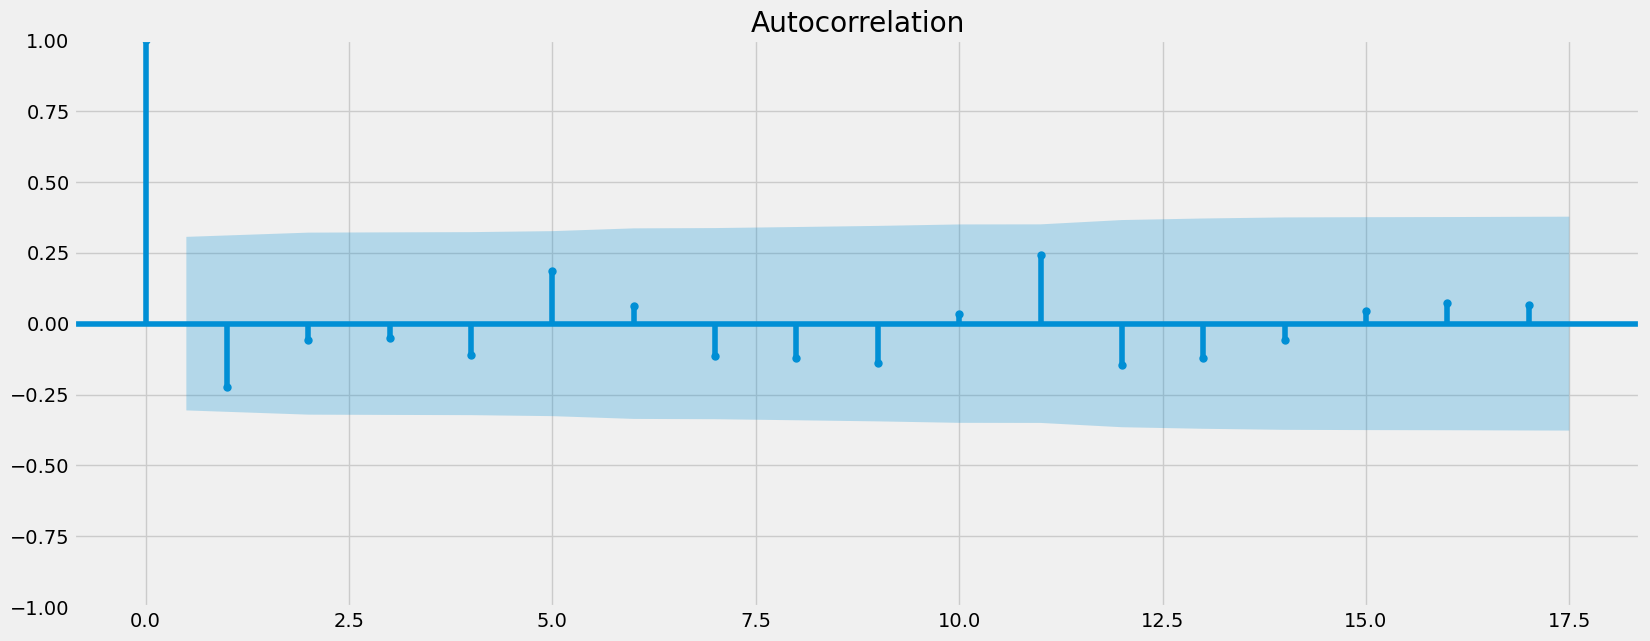

In [47]:
plot_acf(data_diff)
plt.show()

#### No Stationary - Another Round of Differencing

In [48]:
data_diff_2 = data_diff - data_diff.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [49]:
data_diff_2.dropna(inplace = True) # Here, you remove the missing values that came about as a result of the differencing. 
# You need to remove these or you won't be able to run the Dickey-Fuller test.

In [50]:
data_diff_2.head()

,value
datetime,
1982-12-31,-328.377
1983-12-31,-138.216
1984-12-31,285.635
1985-12-31,-68.358
1986-12-31,-111.707


In [51]:
data_diff_2.columns

Index(['value'], dtype='object')

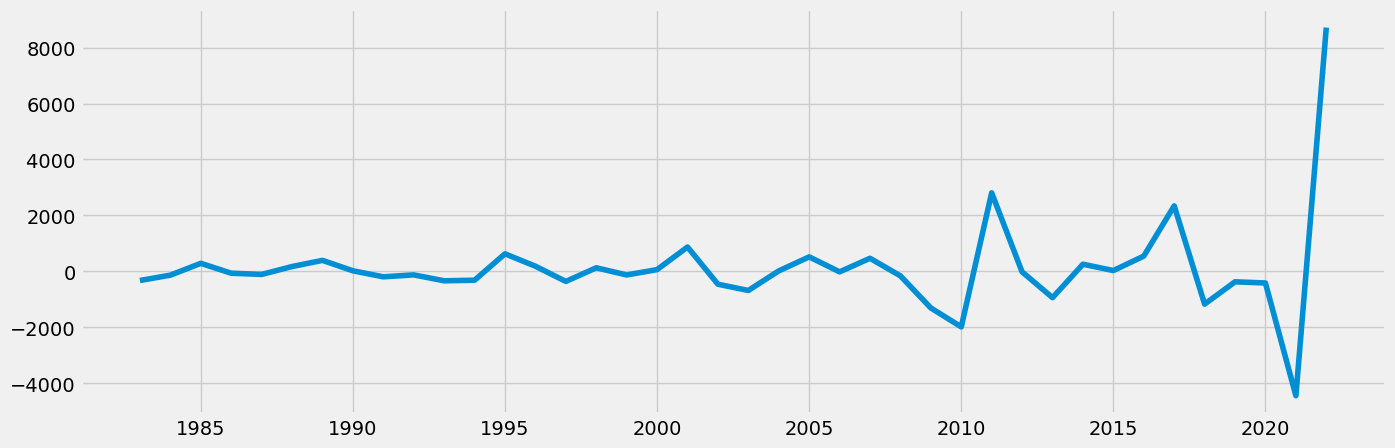

In [52]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff_2)

In [53]:
dickey_fuller(data_diff_2)

Dickey-Fuller Stationarity test:
Test Statistic                 -1.357722
p-value                         0.602368
Number of Lags Used            10.000000
Number of Observations Used    29.000000
Critical Value (1%)            -3.679060
Critical Value (5%)            -2.967882
Critical Value (10%)           -2.623158
dtype: float64


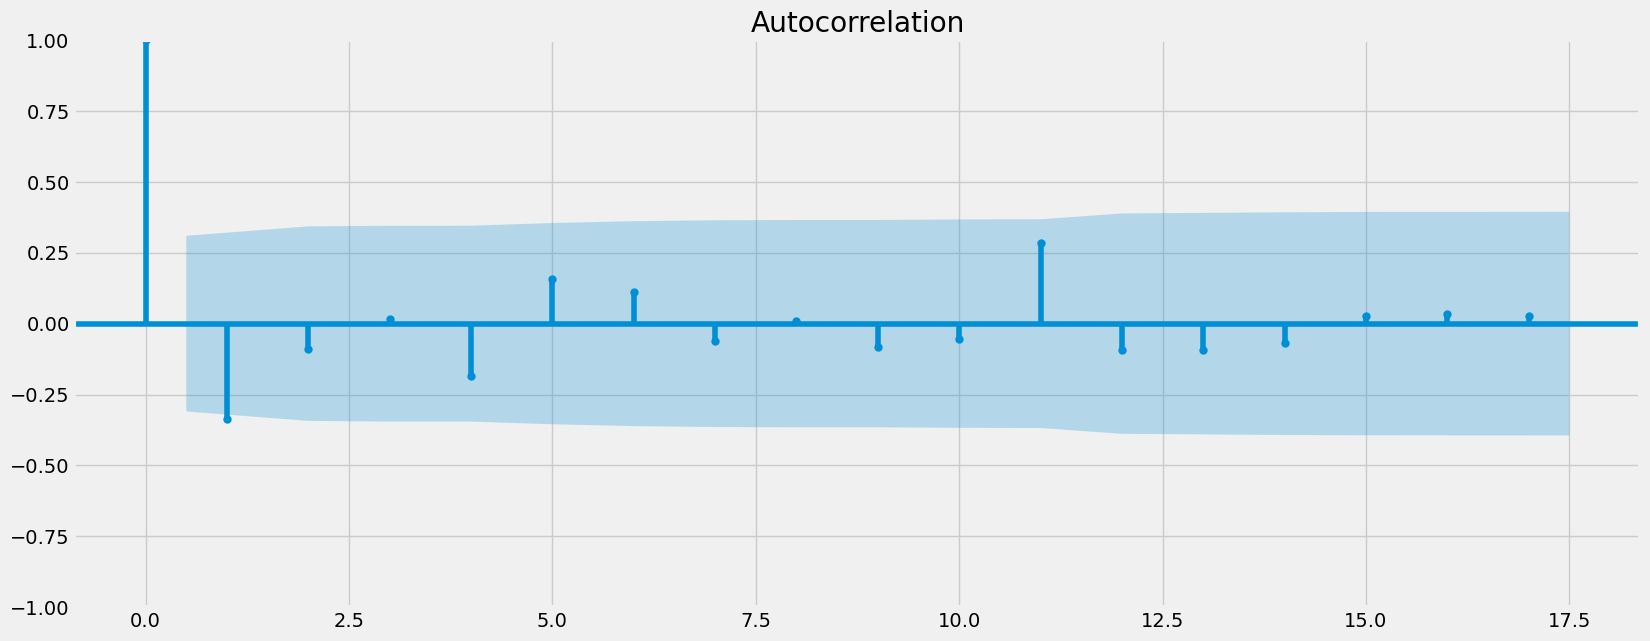

In [54]:
plot_acf(data_diff_2)
plt.show()

In [55]:
data_diff_3 = data_diff_2 - data_diff_2.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [56]:
data_diff_3.dropna(inplace = True) # Here, you remove the missing values that came about as a result of the differencing. 
# You need to remove these or you won't be able to run the Dickey-Fuller test.

In [57]:
data_diff_3.head()

,value
datetime,
1983-12-31,190.161
1984-12-31,423.851
1985-12-31,-353.993
1986-12-31,-43.349
1987-12-31,281.856


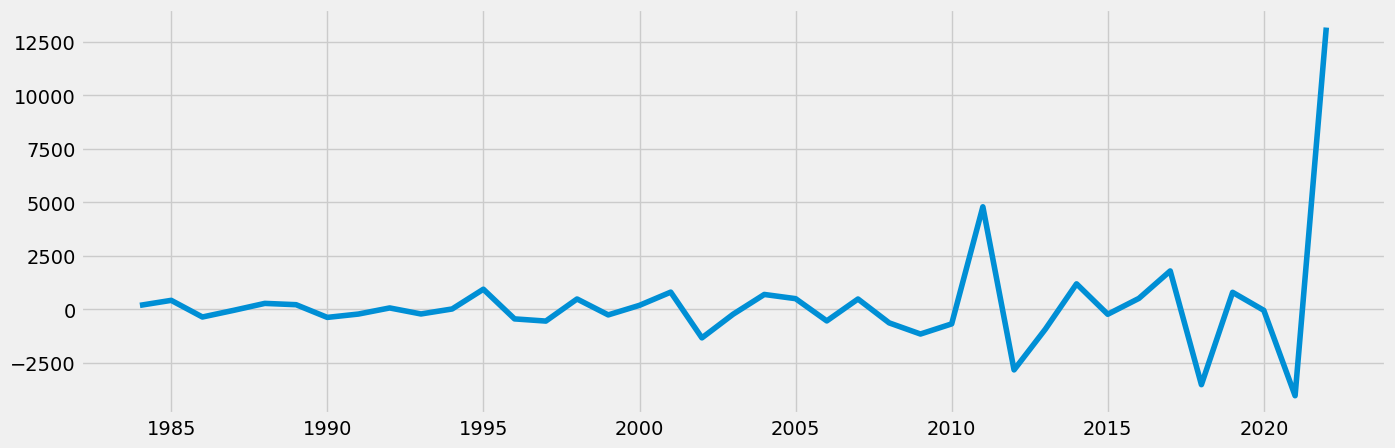

In [58]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff_3)

In [59]:
dickey_fuller(data_diff_3)

Dickey-Fuller Stationarity test:
Test Statistic                 -4.960098
p-value                         0.000027
Number of Lags Used             9.000000
Number of Observations Used    29.000000
Critical Value (1%)            -3.679060
Critical Value (5%)            -2.967882
Critical Value (10%)           -2.623158
dtype: float64


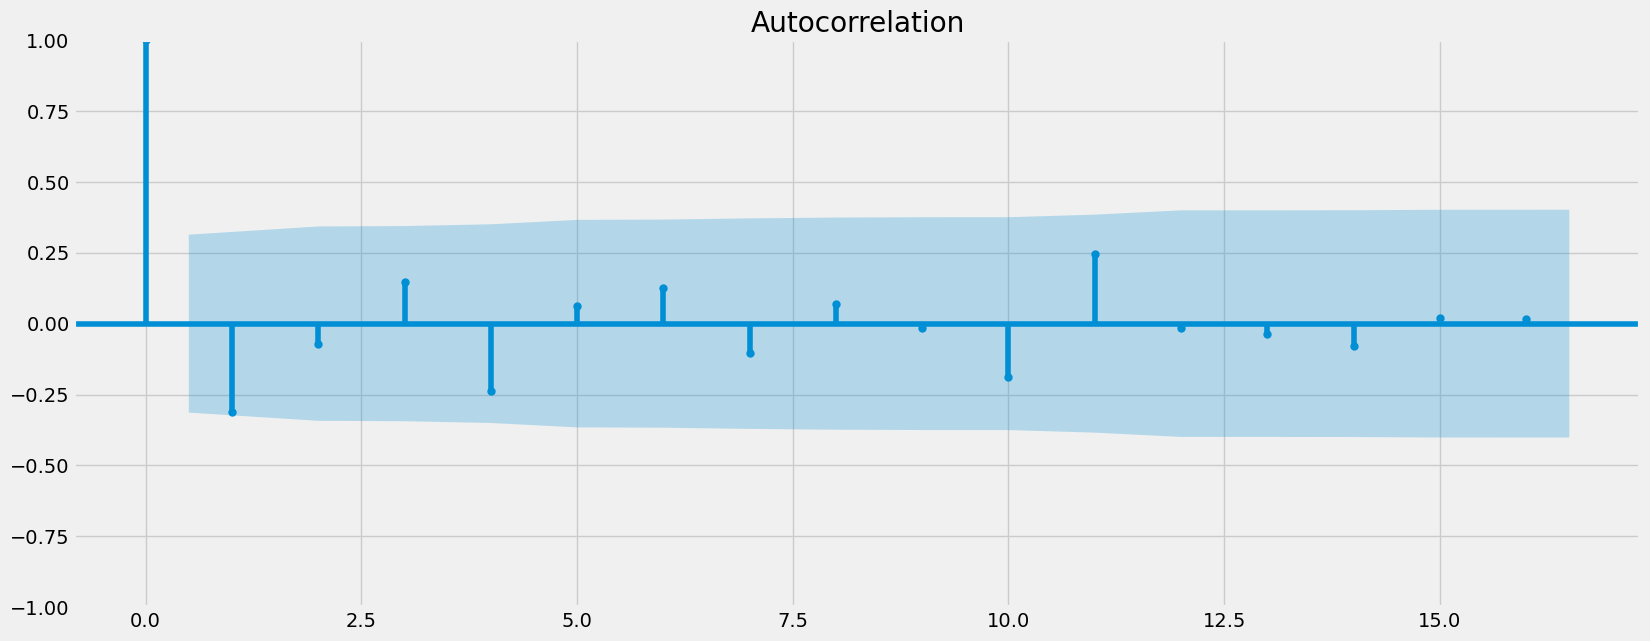

In [60]:
plot_acf(data_diff_3)
plt.show()

##### Analysis 

###### After three differencing procedures, it is possible to notice that the Test Statistic does presented a value below all Critical Value, as well as the p-value being a lot inferior than 0.05, demonstrating that the value is significant and has become stationary.

###### As for the autocorrelation, both data after the differencing showed only one lag above the blue edge, which could indicate a stationary data.

###### So, it is possible to tell that the data presented is  stationary, and, could be used for carrying out a time-series analysis.